In [1]:
import numpy as np
from debugpy.adapter.components import ACCEPT_CONNECTIONS_TIMEOUT

my = np.array([1,3])

In [2]:
if 54 < 333:
    print("Hey")

Hey


In [3]:
def infinite_sequence():
    num = 0
    while num<20:
        yield num
        num += 1

lista = [i*2 for i in infinite_sequence()]
print(lista)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]


In [4]:
x = np.array([[1,2,3],[5,6,9]])
np.sum(x)

np.int64(26)

In [5]:
x = np.array([1,2,3,4,5,6])
print(f"Original array:\n {x}")
x_reshape = x.reshape((2,3))
print(f"New array:\n {x_reshape}")

Original array:
 [1 2 3 4 5 6]
New array:
 [[1 2 3]
 [4 5 6]]


In [6]:
print('x before we modify x_reshape:\n', x)
print('x_reshape before we modify x_reshape:\n', x_reshape)
x_reshape[0, 0] = 5
print('x_reshape after we modify its top left element:\n',
x_reshape)
print('x after we modify top left element of x_reshape:\n', x)

x before we modify x_reshape:
 [1 2 3 4 5 6]
x_reshape before we modify x_reshape:
 [[1 2 3]
 [4 5 6]]
x_reshape after we modify its top left element:
 [[5 2 3]
 [4 5 6]]
x after we modify top left element of x_reshape:
 [5 2 3 4 5 6]


In [7]:
print(x_reshape.T)
print(np.sqrt(x_reshape))
print(x_reshape.T)

[[5 4]
 [2 5]
 [3 6]]
[[2.23606798 1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]
[[5 4]
 [2 5]
 [3 6]]


In [8]:
x = np.random.normal(size=50)
y = x + np.random.normal(loc=50, scale = 1, size=50)
print(y)

[48.43956493 50.7936459  50.84346138 49.34536016 47.94824245 50.13037403
 49.88678097 50.0388181  51.35300698 49.20967834 48.9875226  51.31106851
 50.83778448 50.22278527 51.13746936 50.43912691 49.24971668 53.34804493
 52.06087594 48.10783705 47.85052287 48.63029242 49.72575634 51.18143764
 46.69887477 50.56964542 50.21659197 52.08460674 49.64184287 50.76545803
 50.34447849 50.85095125 50.97414778 48.10736451 49.27860561 48.04014614
 51.80495005 49.77231476 51.44452906 52.55968953 49.45773741 48.21536021
 49.97727296 50.7723926  50.19299186 50.21460028 47.8031054  49.84400693
 49.57094457 50.95483211]


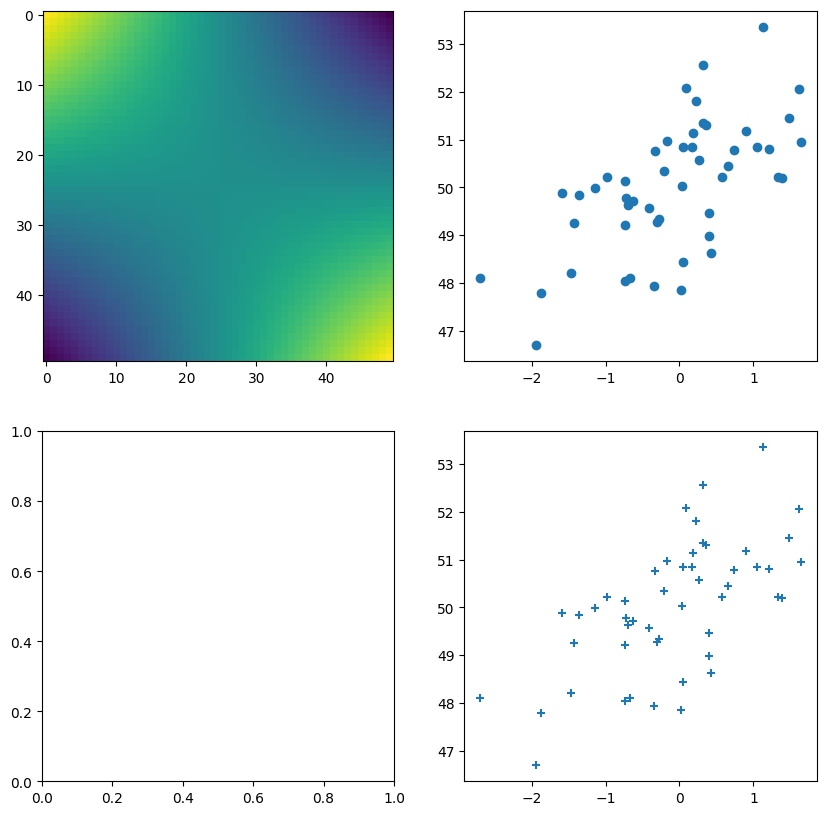

In [9]:
from matplotlib import pyplot as plt
tup = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax = tup[1]
fig = tup[0]
tup[1][0,1].plot(x,y,'o')
tup[1][1,1].scatter(x,y,marker='+')
x1 = np.linspace(-2*np.pi,2*np.pi,50)
y1 = x1
f = np.outer(x1,y1)
ax[0,0].imshow(f)
#tup[0].suptitle('Plot title', fontsize=20)
#tup[0].savefig('./test.png', dpi=300)
# tup[1].scatter(x, y, marker='o')

In [10]:
print("Helloworld"[slice(3,6)])

low


INDEXING


In [11]:
a = np.array(np.arange(16)).reshape((4,4))
a[[0,2],[0,1]]


array([0, 9])

In [12]:
import pandas as pd
cycles = [str(i) for i in range(200,2000,200)]
Auto = pd.DataFrame()
max_rec = 0
max_TS = 0
max_Cyc = 0
file_boundary =[]
for i in cycles:
    Temp = pd.read_csv('./FYP/Data/Full_Test_Data/LG_32/LG_32_2_'+i+'.csv', skiprows=2)
    Temp.drop(Temp.columns[len(Temp.columns)-1],axis=1,inplace=True)
    Temp.drop('DPt Time', axis=1, inplace=True, errors='ignore')
    Temp.drop('ES', axis=1, inplace=True, errors='ignore')
    Temp['Rec#'] += max_rec
    max_rec = Temp['Rec#'].max()
    Temp['Cyc#'] += max_Cyc
    max_Cyc = Temp['Cyc#'].max()
    print(f"Current max cyc: {max_Cyc}, on file: ...{i}")
    file_boundary.append(max_Cyc)
    Auto = pd.concat([Auto, Temp], axis=0)


Current max cyc: 195, on file: ...200
Current max cyc: 390, on file: ...400
Current max cyc: 595, on file: ...600
Current max cyc: 800, on file: ...800
Current max cyc: 1005, on file: ...1000
Current max cyc: 1210, on file: ...1200
Current max cyc: 1415, on file: ...1400
Current max cyc: 1620, on file: ...1600
Current max cyc: 1825, on file: ...1800


print([Auto[i].dtype for i in Auto.columns])
B = Auto['Volts']<3.5
Auto[B].head()

In [13]:
import numpy as np

cleaned = []

for cyc, group in Auto.groupby('Cyc#'):
    group = group.copy()  # avoid SettingWithCopyWarning

    # Normalize columns
    group['Temp 1'] = group['Temp 1'] - group['Temp 1'].iloc[0]
    group['TestTime'] = group['TestTime'] - group['TestTime'].iloc[0]
    # Apply filters
    if ((group['Volts'] > 4.05) & (group['TestTime'] < 1000)).any():
       continue

    if ((group['Amps'] > -3) & (group['TestTime'] < 1000)).any():
       continue

    if (group['Temp 1'].max() > 11) | (group['Temp 1'].min() < -2):
        group['Temp 1'] = np.nan
    #    continue
    # --- New check for Temp 1 at TestTime ≈ 2000 ---
    # Find the row closest to 2000
    idx_2000 = (group['TestTime'] - 2000).abs().idxmin()
    temp_at_2000 = group.loc[idx_2000, 'Temp 1']

    if temp_at_2000 < 0.5:
        group['Temp 1'] = np.nan

    cleaned.append(group)

# Combine all good cycles
Auto = pd.concat(cleaned, ignore_index=True)
last_cyc = Auto['Cyc#'].max()
Auto = Auto[Auto['Cyc#'] != last_cyc]


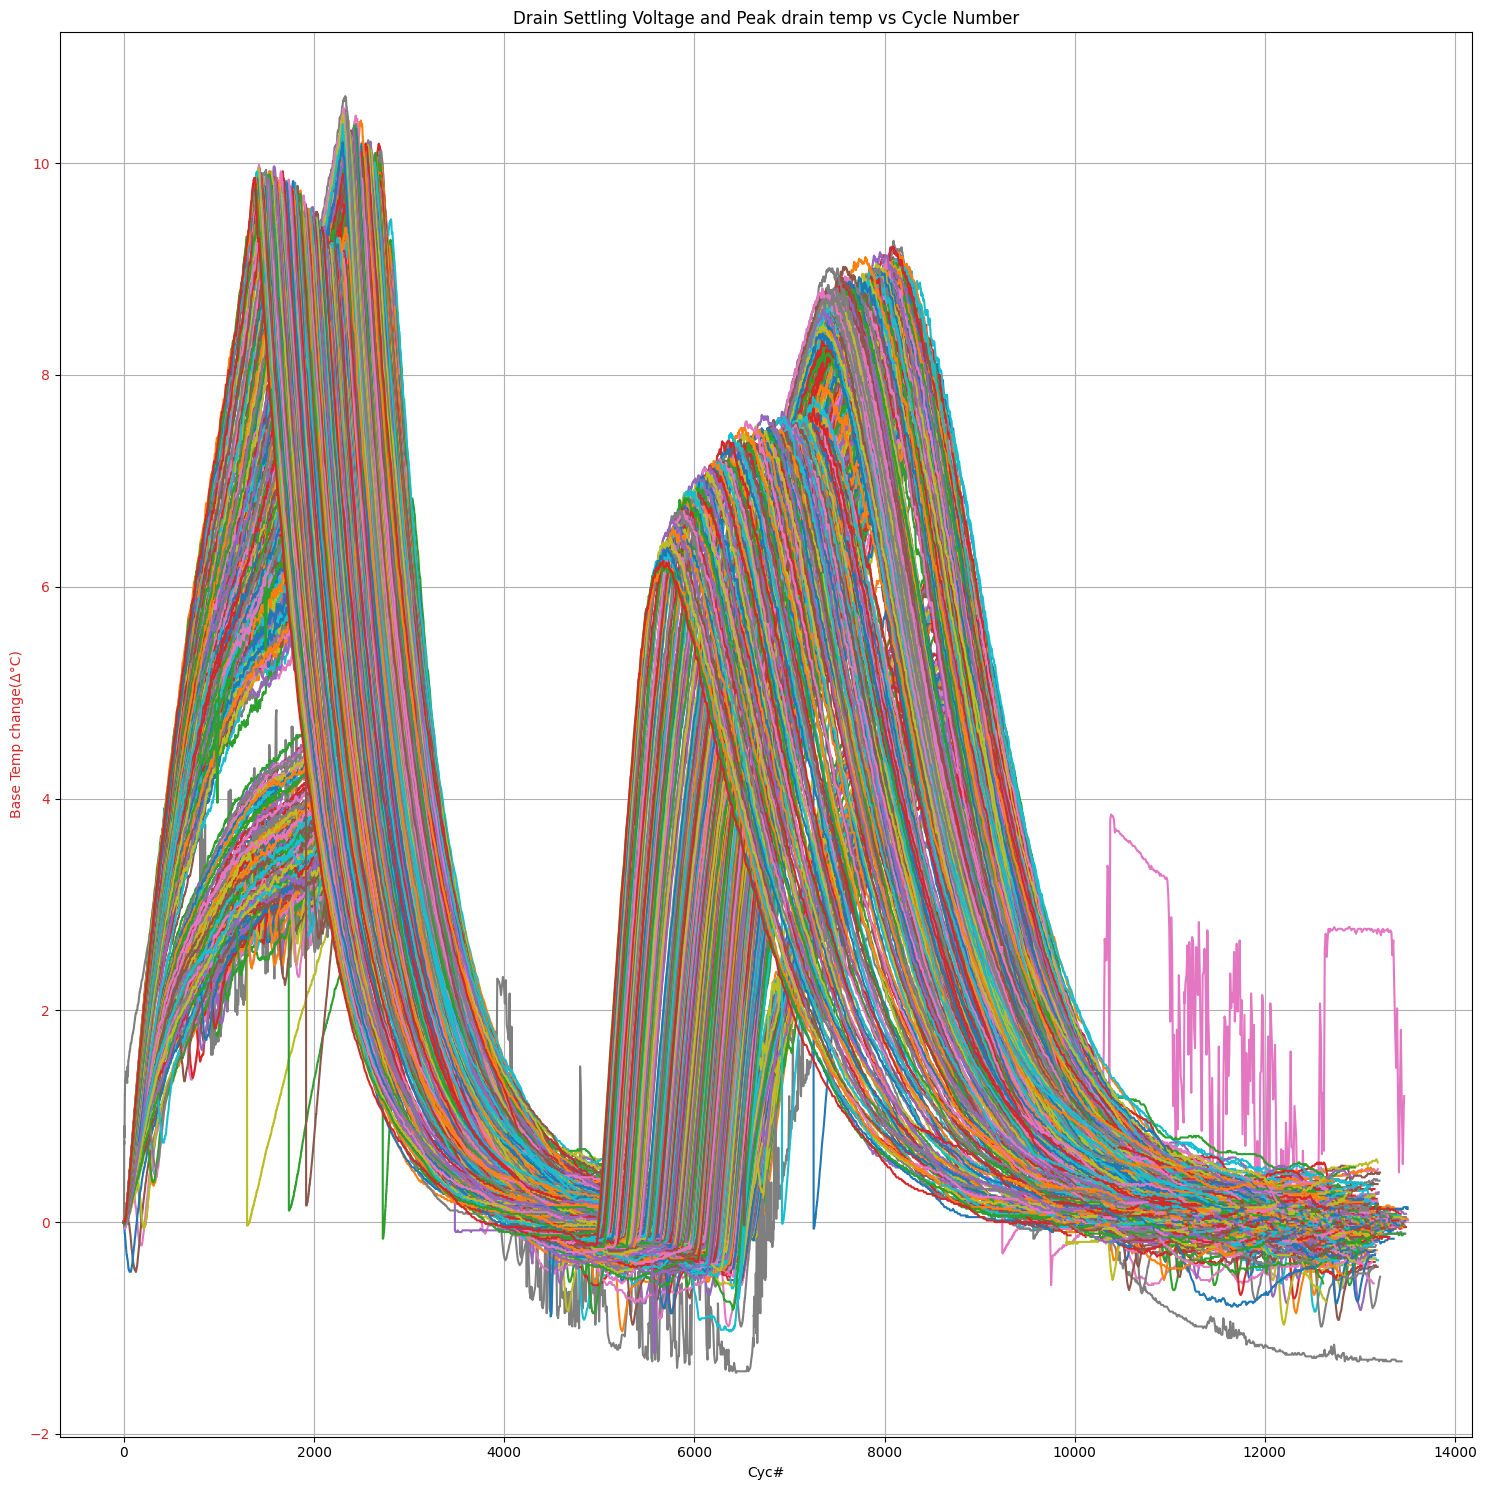

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
for cyc, group in Auto.groupby('Cyc#'):
    ax.plot(group['TestTime'], group['Temp 1'])
color2 = 'tab:red'
ax.set_ylabel('Base Temp change(Δ°C)', color=color2)
ax.set_xlabel('Cyc#')
ax.tick_params(axis='y', labelcolor=color2)
plt.title('Drain Settling Voltage and Peak drain temp vs Cycle Number')
fig.tight_layout()
plt.grid(True)
plt.show()
fig.savefig("LG_32_2temp.png", dpi=300)

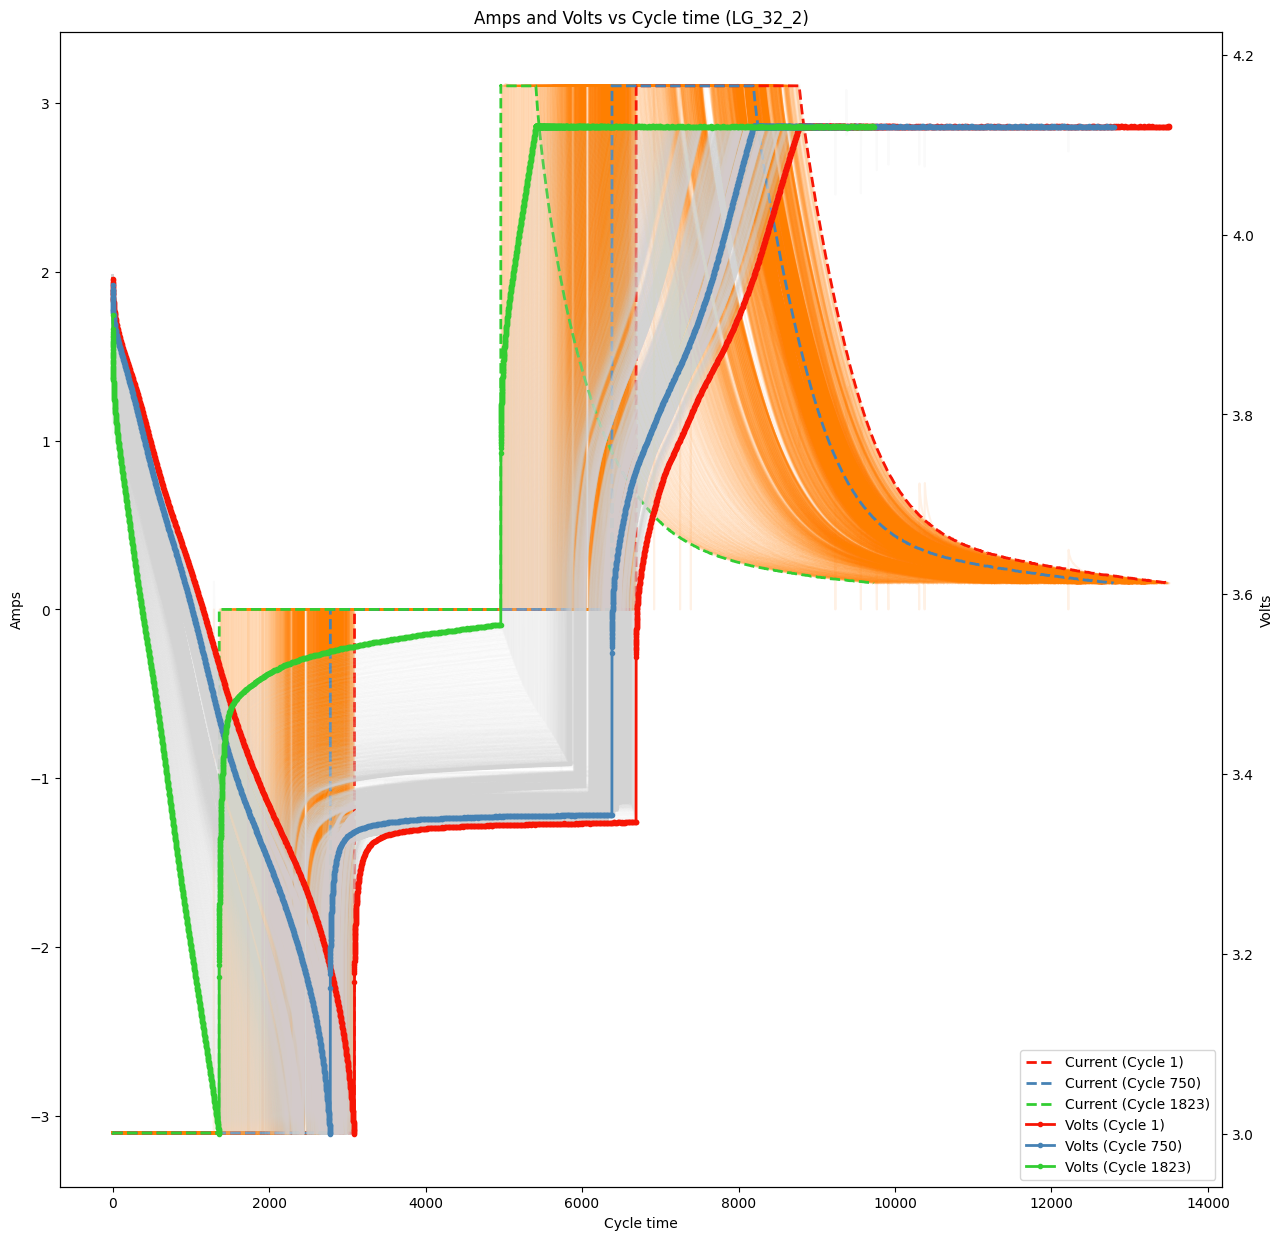

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
ax2 = ax.twinx()

highlight_colors = {1: '#f71505', 750: '#4682B4', Auto['Cyc#'].max(): '#32CD32'}
default_color = '#D3D3D3'
volt_color = '#FF7F00'

# Group once (fast)
groups = Auto.groupby('Cyc#')

# --- Plot non-highlighted cycles (faint) ---
for cyc, data in groups:
    if cyc in highlight_colors:
        continue
    ax.plot(data['TestTime'], data['Amps'], color=volt_color, alpha=0.1)
    ax2.plot(data['TestTime'], data['Volts'], color=default_color, alpha=0.1)

# --- Plot highlighted cycles ---
for cyc, color in highlight_colors.items():
    data = groups.get_group(cyc)
    ax.plot(data['TestTime'], data['Amps'], '--', color=color, alpha=1, linewidth=2, label=f'Current (Cycle {cyc})')
    ax2.plot(data['TestTime'], data['Volts'], '.-', color=color, alpha=1, linewidth=2, label=f'Volts (Cycle {cyc})')

# --- Labels and legend ---
ax.set_xlabel('Cycle time')
ax.set_ylabel('Amps')
ax2.set_ylabel('Volts')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.title('Amps and Volts vs Cycle time (LG_32_2)')
plt.show()


In [16]:
fig.savefig('LG_32_2_CV.png', dpi=500);



In [17]:
import os
from scipy.io import savemat
# Create export directory
export_dir = "cycle_exports/LG_32_2"
os.makedirs(export_dir, exist_ok=True)

# Choose cycle interval (every 100th)
cycle_interval = 1

# Loop over every 100th cycle
for cyc, data in Auto.groupby('Cyc#'):
    if cyc % cycle_interval == 0 or cyc in [1, Auto['Cyc#'].max()]:  # also include first and last
        #export_path = os.path.join(export_dir, f"cycle_{cyc}.csv")
        mdict = {'tt': data['TestTime'].to_numpy().reshape(-1,1), 'u1': data['Amps'].to_numpy().reshape(-1,1),'tp': data['Temp 1'].to_numpy().reshape(-1,1), 'y': data['Volts'].to_numpy().reshape(-1,1)}
        savemat(os.path.join(export_dir, f"LG_32_2_{cyc}.mat"), mdict)
      #  data[['TestTime', 'Amps', 'Volts', 'Temp 1']].to_csv(export_path, index=False)

print(f"Exported cycles every {cycle_interval} to '{export_dir}/'")

Exported cycles every 1 to 'cycle_exports/LG_32_2/'


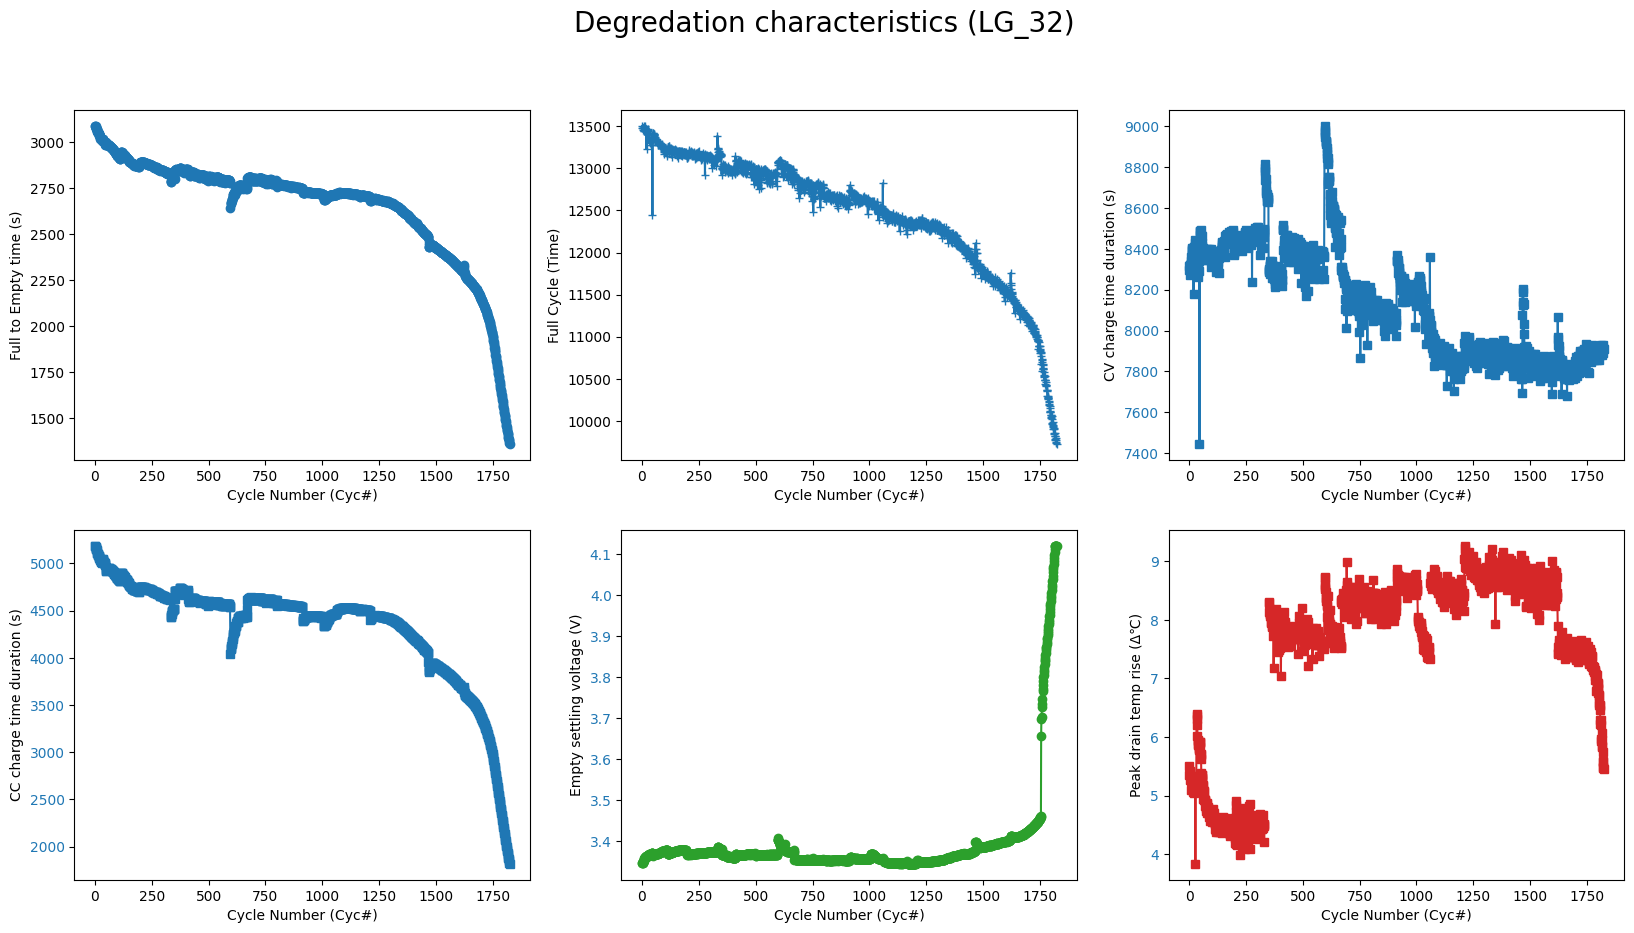

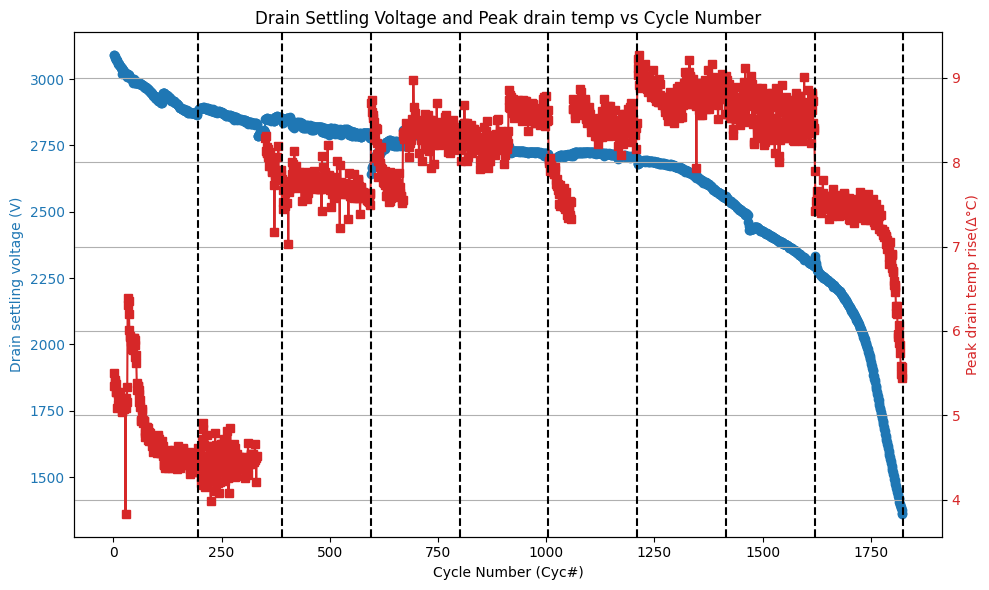

In [18]:
import pandas as pd
import matplotlib.pyplot as plt



# list to store (cycle, voltage, temperature)
vals_at_5500 = []

for cyc, group in Auto.groupby('Cyc#'):
    # find the index where TestTime is closest to 5500
    idx = (group['TestTime'] - 5500).abs().idxmin()
    v = group.loc[idx, 'Volts']
    t = group.loc[group['TestTime'] > 6000, 'Temp 1'].max()
    time = group['TestTime'].max()
    drain_time = group.loc[group['Volts'].idxmin(), 'TestTime']
    amp_max = group['Amps'].max()
    cross_idx = group[group['Amps'] >= 0.98 * amp_max].index[0]
    settle_time = group.loc[cross_idx, 'TestTime'] - drain_time
    cross_idx_min = group[group['Amps'] >= 0.98 * amp_max].index[-1]
    cc_time = group.loc[cross_idx_min, 'TestTime'] - settle_time
    cv_time = time - cc_time
    vals_at_5500.append((cyc, v, t, drain_time, time, settle_time, cc_time, cv_time))
  #  print(f"Cyc: {cyc}, v: {v}, drain time = {drain_time} settle_time = {settle_time}, cc_time = {cc_time}, cv_time = {cv_time}")

# convert to DataFrame for plotting
vals_df = pd.DataFrame(vals_at_5500, columns=['Cyc#', 'Voltage_at_5500', 'Temp1_at_5500','Drain Time', 'Cycle_time', 'settle_time', 'cc_time', 'cv_time'])


tup = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
tup[0].suptitle('Degredation characteristics (LG_32)', fontsize=20)
ax = tup[1]
fig = tup[0]
color1 = 'tab:blue'
color2 = 'tab:red'
color3= 'tab:green'
tup[1][0,0].plot(vals_df['Cyc#'],vals_df['Drain Time'],'o')
ax[0,0].set_xlabel('Cycle Number (Cyc#)')
ax[0,0].set_ylabel(u'Full to Empty time (s)')
tup[1][0,1].plot(vals_df['Cyc#'],vals_df['Cycle_time'],color=color1, marker='+')
ax[0,1].set_xlabel('Cycle Number (Cyc#)')
ax[0,1].set_ylabel('Full Cycle (Time)')
ax[1,1].set_xlabel('Cycle Number (Cyc#)')
ax[1,1].set_ylabel('Empty settling voltage (V)')
ax[1,1].plot(vals_df['Cyc#'], vals_df['Voltage_at_5500'], color=color3, marker='o', label='Voltage')
ax[1,1].tick_params(axis='y', labelcolor=color1)

ax[1,0].set_xlabel('Cycle Number (Cyc#)')
ax[1,0].set_ylabel(u'CC charge time duration (s)')
ax[1,0].plot(vals_df['Cyc#'], vals_df['cc_time'], color=color1, marker='s')
ax[1,0].tick_params(axis='y', labelcolor=color1)
ax[0,2].set_xlabel('Cycle Number (Cyc#)')
ax[0,2].set_ylabel(u'CV charge time duration (s)')
ax[0,2].plot(vals_df['Cyc#'], vals_df['cv_time'], color=color1, marker='s')
ax[0,2].tick_params(axis='y', labelcolor=color1)
ax[1,2].set_xlabel('Cycle Number (Cyc#)')
ax[1,2].set_ylabel(u'Peak drain temp rise (Δ℃)')
ax[1,2].plot(vals_df['Cyc#'], vals_df['Temp1_at_5500'], color=color2, marker='s')
ax[1,2].tick_params(axis='y', labelcolor=color1)

plt.show()
fig.savefig('LG_32_2_Cycle_Feautres.png', dpi=400);
# --- Plot both on separate y-axes ---
fig, ax1 = plt.subplots(figsize=(10, 6))
color1 = 'tab:blue'
ax1.set_xlabel('Cycle Number (Cyc#)')
ax1.set_ylabel('Drain settling voltage (V)', color=color1)
ax1.plot(vals_df['Cyc#'], vals_df['Drain Time'], color=color1, marker='o', label='Voltage')
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Peak drain temp rise(Δ°C)', color=color2)
ax2.plot(vals_df['Cyc#'], vals_df['Temp1_at_5500'], color=color2, marker='s', label='Temperature')
ax2.tick_params(axis='y', labelcolor=color2)
for i in file_boundary:
  plt.axvline(int(i), color='k', linestyle='--', label='')
# Titles and grid
plt.title('Drain Settling Voltage and Peak drain temp vs Cycle Number')
fig.tight_layout()
plt.grid(True)
plt.show()
fig.savefig('LG_32_2_Cycle_Boundary.png', dpi=400);


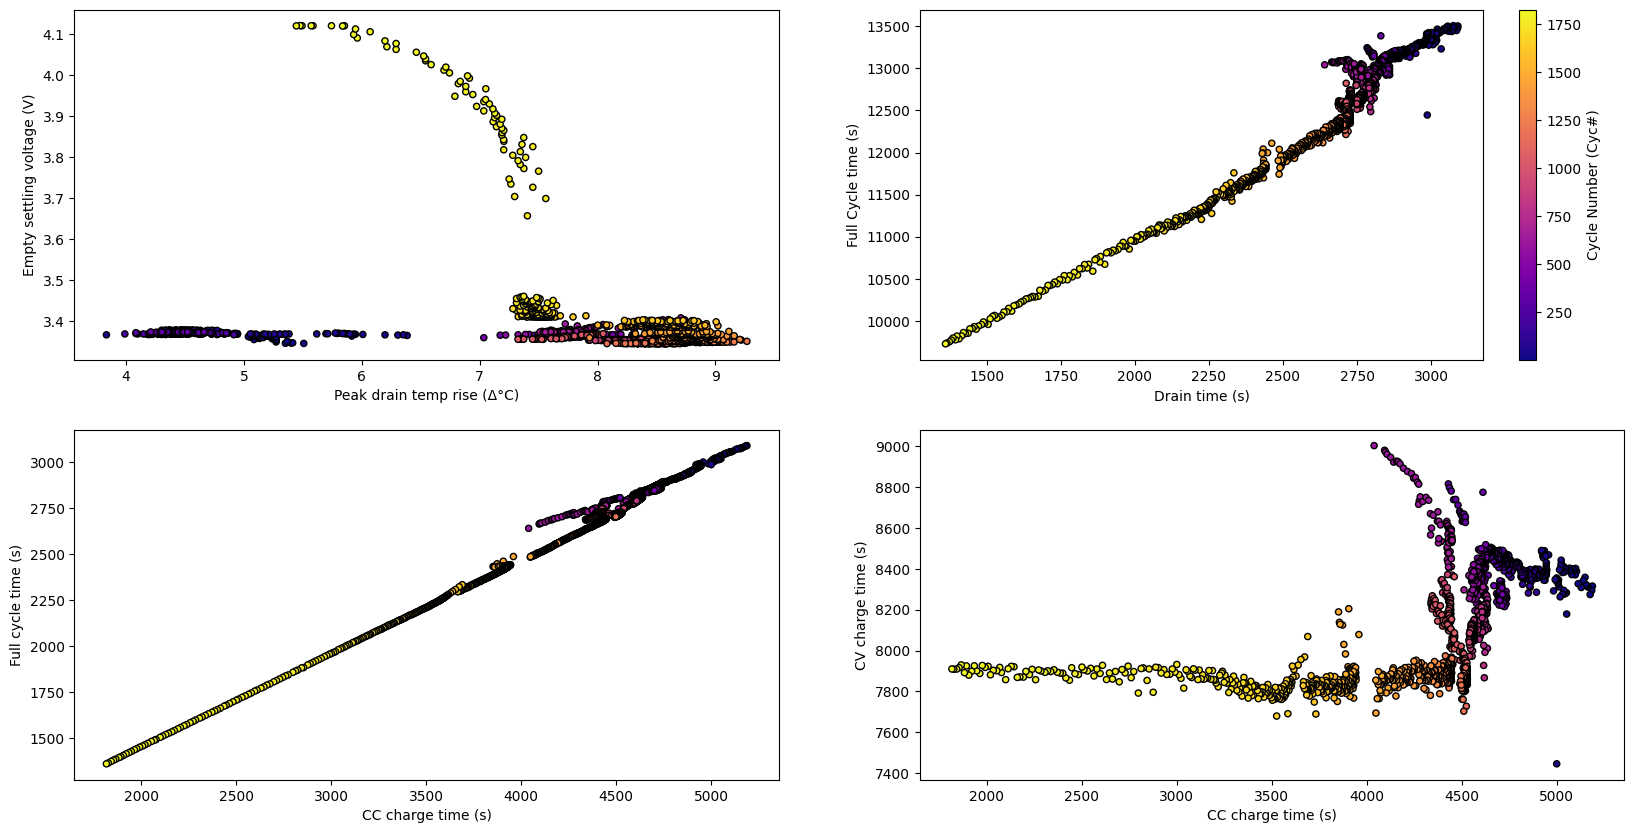

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl


tup = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = tup[1]
ax1 = ax[0,0]
fig = tup[0]
norm = mpl.colors.Normalize(vmin=vals_df['Cyc#'].min(), vmax=vals_df['Cyc#'].max())
cmap = plt.colormaps['plasma']
scatter = ax1.scatter(
    vals_df['Temp1_at_5500'],
    vals_df['Voltage_at_5500'],
    c=vals_df['Cyc#'],
    cmap=cmap,
    norm=norm,
    s=20,
    edgecolors='k'
)
cbar = plt.colorbar(scatter, ax=[tup[1][0,1]])
cbar.set_label('Cycle Number (Cyc#)')
ax1.set_xlabel(u'Peak drain temp rise (Δ°C)')
ax1.set_ylabel('Empty settling voltage (V)')

scatter2 = tup[1][0,1].scatter(
    vals_df['Drain Time'],
    vals_df['Cycle_time'],
    c=vals_df['Cyc#'],
    cmap=cmap,
    norm=norm,
    s=20,
    edgecolors='k'
)
ax[0,1].set_xlabel('Drain time (s)')
ax[0,1].set_ylabel('Full Cycle time (s)')

scatter3 = tup[1][1,1].scatter(
    vals_df['cc_time'],
    vals_df['cv_time'],
    c=vals_df['Cyc#'],
    cmap=cmap,
    norm=norm,
    s=20,
    edgecolors='k'
)
ax[1,1].set_xlabel('CC charge time (s)')
ax[1,1].set_ylabel('CV charge time (s)')

scatter4 = tup[1][1,0].scatter(
    vals_df['cc_time'],
    vals_df['Drain Time'],
    c=vals_df['Cyc#'],
    cmap=cmap,
    norm=norm,
    s=20,
    edgecolors='k'
)
ax[1,0].set_xlabel('CC charge time (s)')
ax[1,0].set_ylabel('Full cycle time (s)')


plt.show()
fig.savefig('LG_32_2_Cycle_Corr.png', dpi=400);
